# Sentiment Analysis(Supervised Classification) of Amazon Alexa Product Reviews

### The Public Relations Team of an MNC has collected extensive data on their customers such as product reviews.

### Based on the reviews(in text format) , the team would like to predict whether the customers are satisfied with their product or not

In [3]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
#Read input data. Data is in tsv so separator is \t(tabspace) not comma in case of csv.
reviews_df = pd.read_csv('amazon_alexa.tsv', sep='\t')

In [30]:
reviews_df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [29]:
reviews_df[reviews_df['rating'] < 3]

,rating,date,variation,verified_reviews,feedback
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0
...,...,...,...,...,...
3047,1,30-Jul-18,Black Dot,Echo Dot responds to us when we aren't even ta...,0
3048,1,30-Jul-18,White Dot,NOT CONNECTED TO MY PHONE PLAYLIST :(,0
3067,2,30-Jul-18,Black Dot,The only negative we have on this product is t...,0
3091,1,30-Jul-18,Black Dot,I didn’t order it,0


### Review seems to be for amazon alexa/echo products. 

* Rating indicates the star reviews. (1-5)
* Date of the review
* Variation refers to the design of the product.
* Feedback is 1 for 3 or more star reviews and 0 for below 3 stars.

In [31]:
# Looks at stats of the dataset
reviews_df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [32]:
reviews_df['verified_reviews']

0                                           Love my Echo!
1                                               Loved it!
2       Sometimes while playing a game, you can answer...
3       I have had a lot of fun with this thing. My 4 ...
4                                                   Music
                              ...                        
3145    Perfect for kids, adults and everyone in betwe...
3146    Listening to music, searching locations, check...
3147    I do love these things, i have them running my...
3148    Only complaint I have is that the sound qualit...
3149                                                 Good
Name: verified_reviews, Length: 3150, dtype: object

# Exploratory Data Analysis

<AxesSubplot:>

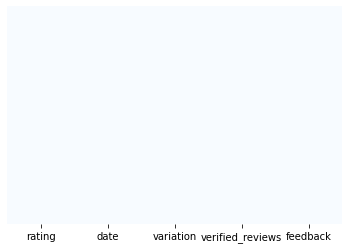

In [33]:
# Visualize any missing values in our dataset using seaborn
sns.heatmap(reviews_df.isnull(), yticklabels=False, cbar = False, cmap='Blues')

array([[<AxesSubplot:title={'center':'feedback'}>,
        <AxesSubplot:title={'center':'rating'}>]], dtype=object)

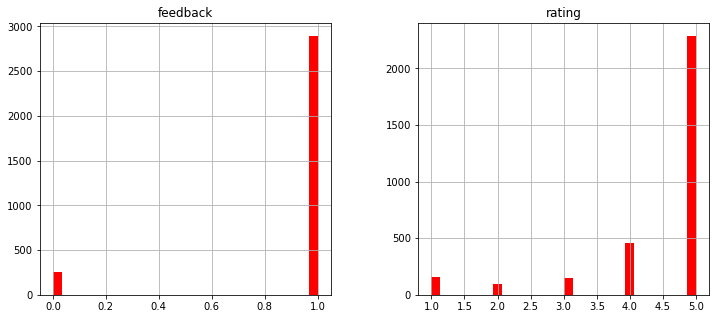

In [43]:
#Plot histograms for numerical variables in the dataframe.
#Total observations = 3150
reviews_df.hist(bins=30,figsize=(12,5), color='r')

Most of observations has a feedback of 1 whereas the rest has feedback 0. We could see similarly most of observations has 5 star ratings

In [44]:
#Adding new column length of reviews. apply inbuilt len function to each element of column review.
reviews_df['length'] = reviews_df['verified_reviews'].apply(len)

In [45]:
reviews_df.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


<AxesSubplot:>

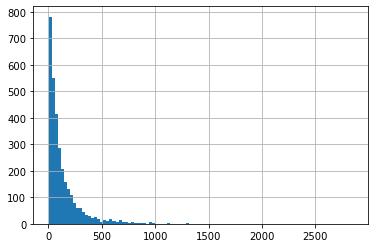

In [50]:
reviews_df['length'].hist(bins=100)
#or use plot. 
#reviews_df['length'].plot(bins=100, kind='hist')

We could observe there are some reviews having 1500 character length

In [51]:
reviews_df['length'].describe()

count    3150.000000
mean      132.049524
std       182.099952
min         1.000000
25%        30.000000
50%        74.000000
75%       165.000000
max      2851.000000
Name: length, dtype: float64

In [53]:
#longest
reviews_df[reviews_df['length'] == 2851]['verified_reviews'].iloc[0]

"Incredible piece of technology.I have this right center of my living room on an island kitchen counter. The mic and speaker goes in every direction and the quality of the sound is quite good. I connected the Echo via Bluetooth to my Sony soundbar on my TV but find the Echo placement and 360 sound more appealing. It's no audiophile equipment but there is good range and decent bass. The sound is more than adequate for any indoor entertaining and loud enough to bother neighbors in my building. The knob on the top works great for adjusting volume. This is my first Echo device and I would imagine having to press volume buttons (on the Echo 2) a large inconvenience and not as precise. For that alone I would recommend this over the regular Echo (2nd generation).The piece looks quality and is quite sturdy with some weight on it. The rubber material on the bottom has a good grip on the granite counter-- my cat can even rub her scent on it without tipping it over.This order came with a free Phi

In [54]:
#shortest
reviews_df[reviews_df['length'] == 1]['verified_reviews'].iloc[0]

'😍'

In [55]:
# Split dataframe to positive and negative
positive = reviews_df[reviews_df['feedback']==1]
negative = reviews_df[reviews_df['feedback']==0]

In [59]:
positive.shape

(2893, 6)

In [60]:
negative.shape

(257, 6)

<AxesSubplot:xlabel='feedback', ylabel='count'>

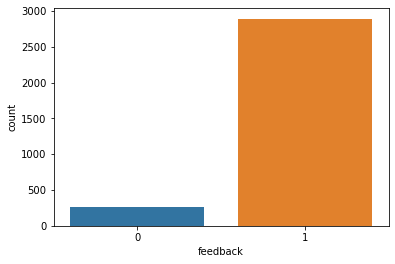

In [58]:
sns.countplot(reviews_df['feedback'], label = 'count')

<AxesSubplot:xlabel='rating', ylabel='count'>

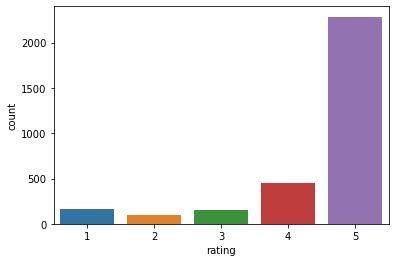

In [66]:
#Another way
#sns.countplot(reviews_df['rating'])
sns.countplot(x='rating', data=reviews_df)
#Continuous-histogram, Discrete-countplot

<AxesSubplot:xlabel='variation', ylabel='rating'>

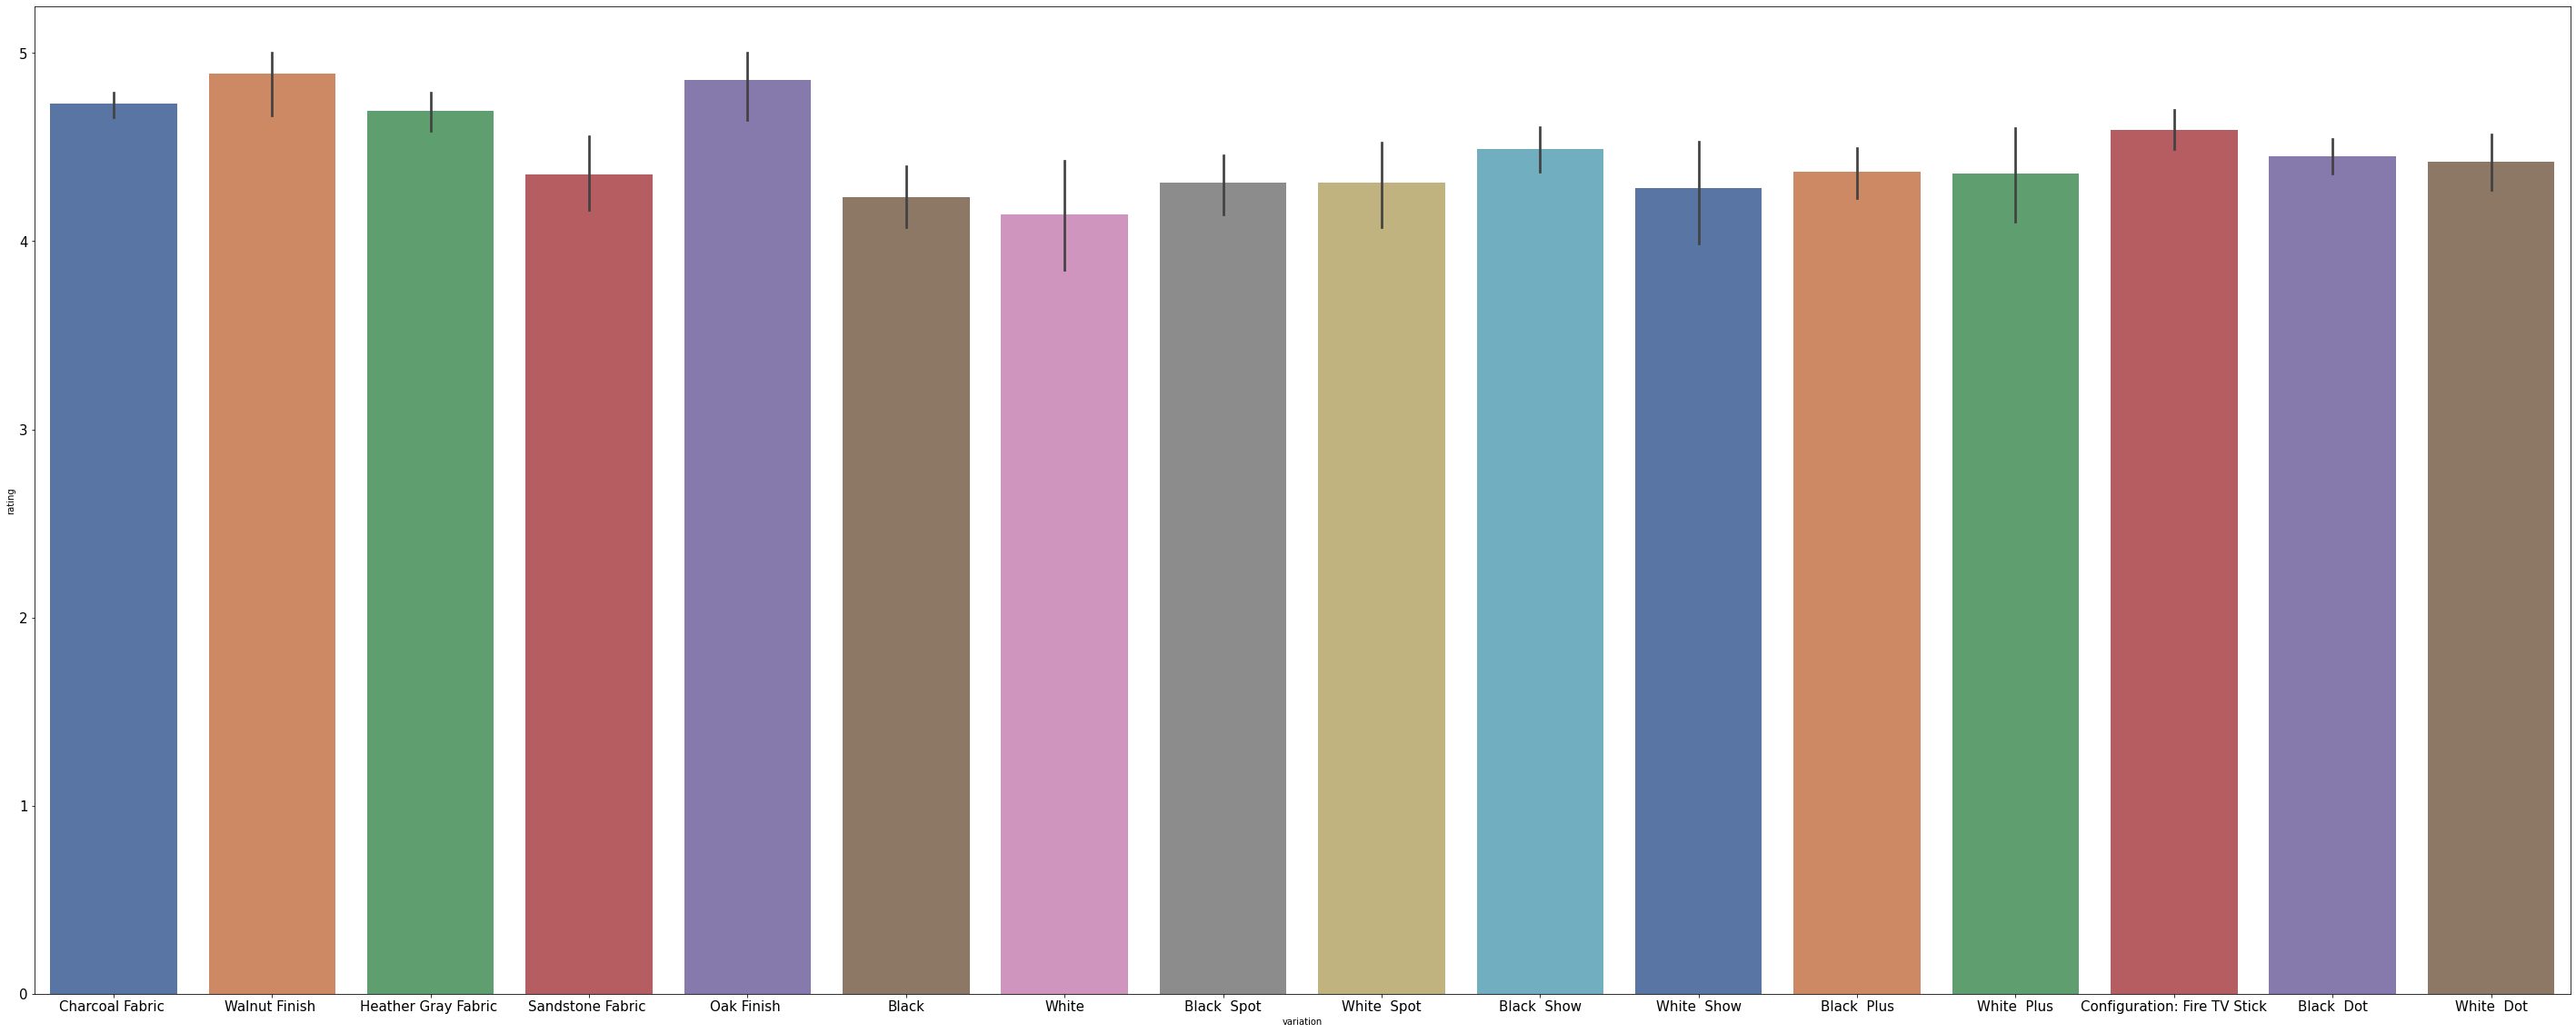

In [75]:
#Check if any relation between variation and rating/feedback
plt.figure(figsize=(50,20))
plt.tick_params(labelsize=15)
sns.barplot(x='variation', y='rating', data=reviews_df, palette='deep')

## Prepare a WORD CLOUD

In [76]:
sentences = reviews_df['verified_reviews'].tolist()

In [77]:
sentences

['Love my Echo!',
 'Loved it!',
 'Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home.',
 'I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.',
 'Music',
 'I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do.',
 'Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet.',
 "I think this is the 5th one I've

In [78]:
sentences_as_one_string = " ".join(sentences)

In [79]:
sentences_as_one_string

'Love my Echo! Loved it! Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home. I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well. Music I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do. Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet. I think this is the 5th one I\'ve purchased. I\'m working on 

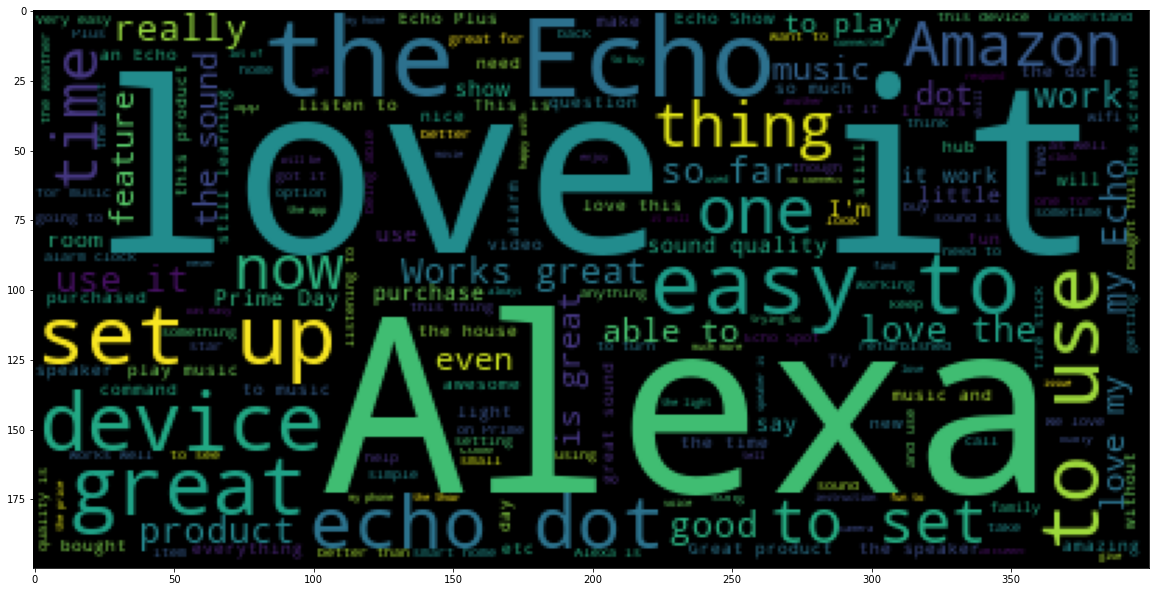

In [80]:
from wordcloud import WordCloud
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

## WordCloud for negative reviews dataframe

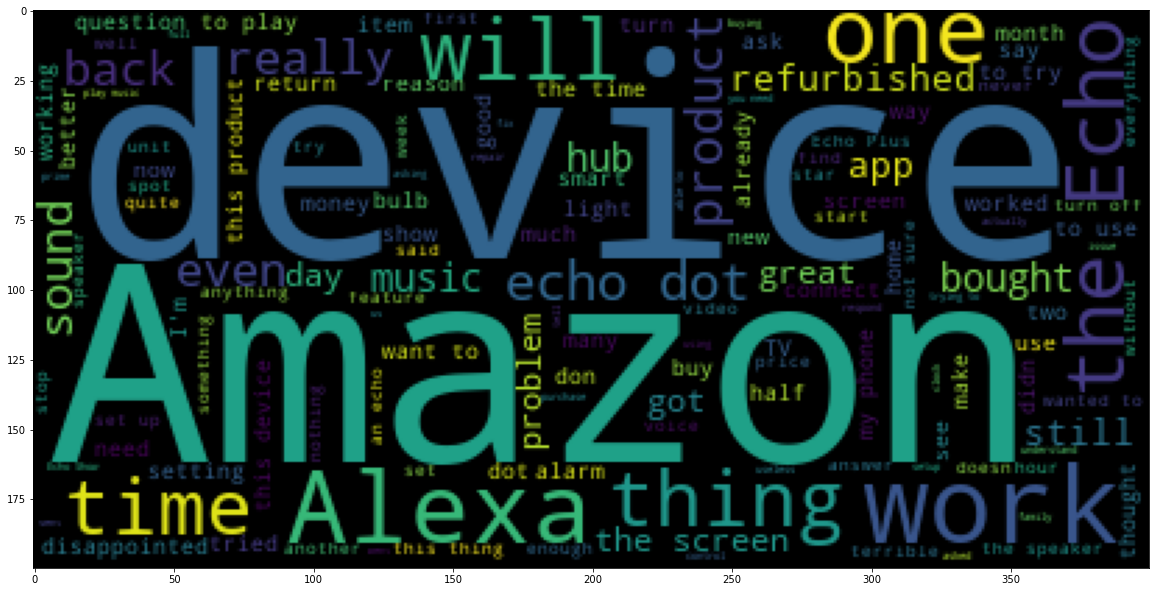

In [82]:
sentences_negative = negative['verified_reviews'].tolist()
sentences_negative_as_one_string = " ".join(sentences_negative)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_negative_as_one_string))
#Remove common words for better word cloud
#plt.imshow(WordCloud(stopwords=['Amazon','Alexa']).generate(sentences_negative_as_one_string))

## Data Cleaning

In [96]:
#Drop rating, data, length
reviews_df=reviews_df.drop(['rating','date','length'], axis=1)

In [97]:
reviews_df.head()

,variation,verified_reviews,feedback
0,Charcoal Fabric,Love my Echo!,1
1,Charcoal Fabric,Loved it!,1
2,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,Charcoal Fabric,Music,1


In [98]:
#Encode variation, drop_first=True to avoid dummy variable trap(where one column can be predicted from others)
variation_dummies = pd.get_dummies(reviews_df['variation'], drop_first=True)

In [99]:
variation_dummies

,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3148,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [100]:
reviews_df.drop(['variation'], axis=1, inplace=True)

In [101]:
reviews_df = pd.concat([reviews_df, variation_dummies], axis=1)

In [102]:
reviews_df

,verified_reviews,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,Love my Echo!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,Loved it!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,"Sometimes while playing a game, you can answer...",1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,I have had a lot of fun with this thing. My 4 ...,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,Music,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,"Perfect for kids, adults and everyone in betwe...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,"Listening to music, searching locations, check...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,"I do love these things, i have them running my...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3148,Only complaint I have is that the sound qualit...,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


## Practice Remove Punctuation from Text

In [103]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [114]:
test = 'I am Mr. Rishi & I am an aspiring data scientist!!!'

In [115]:
#Single line for loop and return based on if condition
test_punc_removed = [ char for char in test if char not in string.punctuation ]

In [116]:
test_punc_removed = ''.join(test_punc_removed)
test_punc_removed

'I am Mr Rishi  I am an aspiring data scientist'

## Practice Remove Stopwords

In [117]:
# Use nltk library to remove stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\RISHI
[nltk_data]     MUKUNTHAN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [119]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [120]:
test_punc_stopwords_removed = [ word for word in test_punc_removed.split() if word.lower() not in stopwords.words('english')]
#.split splits/tokenizes based on space

In [121]:
test_punc_stopwords_removed

['Mr', 'Rishi', 'aspiring', 'data', 'scientist']

## Practice Perform Count Vectorization

Creating a document-term matrix for the dataset with elements being count of the token in that observation and columns/features being all unique words in all observations

In [137]:
from sklearn.feature_extraction.text import CountVectorizer
sample_data = ['This is the first review', 'This observation second observation', 'Is this the third document or review?']
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sample_data)

In [138]:
print(vectorizer.get_feature_names())

['document', 'first', 'is', 'observation', 'or', 'review', 'second', 'the', 'third', 'this']


In [139]:
print(X.toarray())

[[0 1 1 0 0 1 0 1 0 1]
 [0 0 0 2 0 0 1 0 0 1]
 [1 0 1 0 1 1 0 1 1 1]]


## Perform Data Cleaning via a pipeline of Remove Punctuation, Stopwords and do count vectorization.

In [142]:
# Pipeline function to remove punctuation and stopwords
def message_cleaning(message):
    test_punc_removed = [ char for char in message if char not in string.punctuation ]
    test_punc_removed = ''.join(test_punc_removed)
    test_punc_stopwords_removed = [ word for word in test_punc_removed.split() if word.lower() not in stopwords.words('english')]
    return test_punc_stopwords_removed

In [143]:
reviews_df_clean = reviews_df['verified_reviews'].apply(message_cleaning)

In [146]:
print(reviews_df_clean[3])

['lot', 'fun', 'thing', '4', 'yr', 'old', 'learns', 'dinosaurs', 'control', 'lights', 'play', 'games', 'like', 'categories', 'nice', 'sound', 'playing', 'music', 'well']


In [148]:
print(reviews_df['verified_reviews'][3])

I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.


In [149]:
reviews_df_clean

0                                            [Love, Echo]
1                                                 [Loved]
2       [Sometimes, playing, game, answer, question, c...
3       [lot, fun, thing, 4, yr, old, learns, dinosaur...
4                                                 [Music]
                              ...                        
3145                    [Perfect, kids, adults, everyone]
3146    [Listening, music, searching, locations, check...
3147    [love, things, running, entire, home, TV, ligh...
3148    [complaint, sound, quality, isnt, great, mostl...
3149                                               [Good]
Name: verified_reviews, Length: 3150, dtype: object

In [150]:
#Direct pipeline with cleaning and vectorizing. Pass cleaning function in analyzer param.
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer = message_cleaning)
reviews_countvectorizer = vectorizer.fit_transform(reviews_df['verified_reviews'])

In [152]:
#Gets all unique words in the dataset
print(vectorizer.get_feature_names())

['072318', '1', '10', '100', '1000', '100X', '1010', '1030pm', '11', '1100sf', '1220', '129', '12am', '15', '150', '19', '1964', '1990s', '1990’s', '1GB', '1rst', '1st', '2', '20', '200', '2000', '2017', '2030', '229', '23', '2448', '247', '24GHZ', '24ghz', '25', '29', '299', '2999', '2Original', '2nd', '2or', '2package', '3', '30', '300', '30so', '334', '34', '342nd', '3434', '34A34', '34Alexa', '34Alexa34', '34Certified', '34Computer34', '34Dot34', '34Drop', '34First', '34Hub', '34I', '34Im', '34NEVER', '34Philips', '34Play', '34Second', '34Skills34', '34Tell', '34The', '34Things', '34Thongs', '34Try', '34Whats', '34alexa34', '34card34', '34cycle', '34cycle34', '34fixes34', '34fun34', '34group34', '34hear34', '34hmm', '34hmmm', '34it34', '34late', '34learn', '34light34', '34lights34', '34listen34', '34minor', '34outlet34', '34personal34', '34she34', '34show', '34smart', '34smart34', '34sorry', '34spying34', '34the', '34thick34', '34things', '34this', '34trouble', '34try', '34turn', '

In [153]:
print(reviews_countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [154]:
reviews_countvectorizer.shape

(3150, 5211)

In [155]:
reviews_df

,verified_reviews,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,Love my Echo!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,Loved it!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,"Sometimes while playing a game, you can answer...",1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,I have had a lot of fun with this thing. My 4 ...,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,Music,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,"Perfect for kids, adults and everyone in betwe...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,"Listening to music, searching locations, check...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,"I do love these things, i have them running my...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3148,Only complaint I have is that the sound qualit...,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [156]:
reviews_df.drop(['verified_reviews'], axis=1, inplace=True)

In [158]:
reviews = pd.DataFrame(reviews_countvectorizer.toarray())

In [160]:
reviews_df = pd.concat([reviews_df, reviews], axis=1)

In [162]:
reviews_df.shape

(3150, 5227)

In [164]:
reviews_df

,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,...,5201,5202,5203,5204,5205,5206,5207,5208,5209,5210
0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3146,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3147,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3148,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [163]:
X = reviews_df.drop(['feedback'],axis=1)
y = reviews_df['feedback']

# Classification Model - Naive Bayes

Intuition - 
1. Prior Probability P(C) for each class. P(0) = Freq(0)/n, P(1) = Freq(1)/n
2. Likelihood P(X/C)- Probability of given point(features) being in class 0 and 1. L(point being 0) and L(point being 1). 
3. Posterior Probability P(C/X) - Product of Prior Probability and Likelihood. For both class 0 and 1.

P(C/X1,X2,X3) = P(X1/C) * P(X2/C) * P(X3/C) * P(C) divided by P(P1,P2,P3)= 1 always.
P(X1/C) = freq(X1) in Class C divided by total no of words in Class C.


In [165]:
X.shape

(3150, 5226)

In [166]:
y.shape

(3150,)

In [167]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [198]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB(alpha=1, class_prior=None, fit_prior=True)
NB_classifier.fit(X_train,y_train)

MultinomialNB(alpha=1)

In [199]:
#Type 1 error - false Positive, Type 2 error - False Negative
from sklearn.metrics import classification_report, confusion_matrix
y_predict_train = NB_classifier.predict(X_train)

<AxesSubplot:>

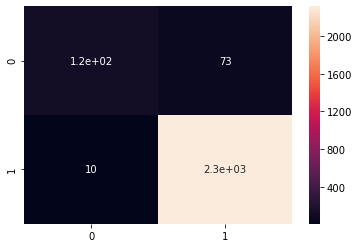

In [200]:
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot = True)

In [201]:
y_predict_test = NB_classifier.predict(X_test)

<AxesSubplot:>

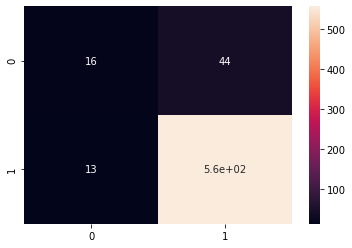

In [202]:
cm_test = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm_test, annot = True)
#Rows represent true values and column represents predicted

In [203]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.55      0.27      0.36        60
           1       0.93      0.98      0.95       570

    accuracy                           0.91       630
   macro avg       0.74      0.62      0.66       630
weighted avg       0.89      0.91      0.89       630



## Logistic Regression

In [187]:
from sklearn.linear_model import LogisticRegression
LR_classifier = LogisticRegression(class_weight='balanced')
LR_classifier.fit(X_train,y_train)

LogisticRegression(class_weight='balanced')

In [188]:
y_predict_test = LR_classifier.predict(X_test)

<AxesSubplot:>

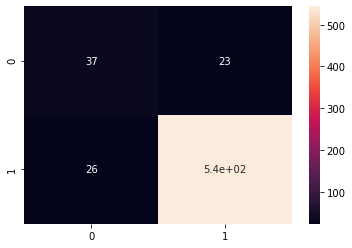

In [189]:
cm_test = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm_test, annot = True)
#Rows represent true values and column represents predicted

In [190]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.59      0.62      0.60        60
           1       0.96      0.95      0.96       570

    accuracy                           0.92       630
   macro avg       0.77      0.79      0.78       630
weighted avg       0.92      0.92      0.92       630



### False Negative or Type 2 error is worse in most cases. So here we want a good recall score to reduce Type 2 error